In [1]:
from platform import python_version

import torch

print(python_version())

3.12.11


In [2]:
torch.xpu.is_available()

True

In [3]:
from ultralytics import YOLO
import cv2

# Load a YOLO11n PyTorch model
model = YOLO("yolo11n.pt")

# Export the model
model.export(format="openvino")  # creates 'yolo11n_openvino_model/'

# Load the exported OpenVINO model
ov_model = YOLO("yolo11n_openvino_model/")

# Run inference
results = ov_model("https://ultralytics.com/images/bus.jpg", device="intel:npu")

C:\Users\kangs\anaconda3\envs\hello-yolo\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Ultralytics 8.3.185  Python-3.12.11 torch-2.8.0+xpu CPU (Intel Core(TM) Ultra 7 258V)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

OpenVINO: starting export with openvino 2025.2.0-19140-c01cd93e24d-releases/2025/2...
OpenVINO: export success  5.6s, saved as 'yolo11n_openvino_model\' (10.4 MB)

Export complete (6.4s)
Results saved to C:\Users\kangs\DataspellProjects\hello-yolo
Predict:         yolo predict task=detect model=yolo11n_openvino_model imgsz=640  
Validate:        yolo val task=detect model=yolo11n_openvino_model imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app
WARNING Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading yolo11n_openvino_model f

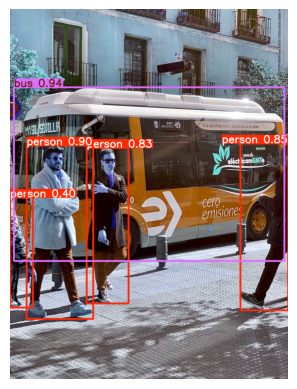

In [4]:
import matplotlib.pyplot as plt

# Tampilkan hasil dengan bounding box
res_plot = results[0].plot()
plt.imshow(res_plot)
plt.axis("off")
plt.show()

In [5]:
results = ov_model("https://ultralytics.com/images/bus.jpg", device="intel:npu")


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 C:\Users\kangs\DataspellProjects\hello-yolo\bus.jpg: 640x640 4 persons, 1 bus, 21.6ms
Speed: 5.0ms preprocess, 21.6ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)


In [6]:
torch.xpu.is_available()

True

In [7]:
import time
import torch

device = torch.device("xpu" if torch.xpu.is_available() else "cpu")

results = ov_model.predict(
    source="datasets/video/2252223-uhd_3840_2160_30fps.mp4",
    device=device,
    stream=True   # gunakan stream=True biar bisa kontrol hasil dengan OpenCV
)

# Variabel untuk hitung FPS
prev_time = 0

for result in results:
    frame = result.plot()  # tambahkan bounding box ke frame

    # Hitung FPS
    curr_time = time.time()
    fps = 1 / (curr_time - prev_time) if prev_time > 0 else 0
    prev_time = curr_time

    # Tulis FPS di frame
    cv2.putText(frame, f"FPS: {fps:.2f}", (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Resize output biar lebih ringan (misal 1280x720)
    frame = cv2.resize(frame, (1280, 720))

    cv2.imshow("Output", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()


video 1/1 (frame 1/619) C:\Users\kangs\DataspellProjects\hello-yolo\datasets\video\2252223-uhd_3840_2160_30fps.mp4: 640x640 8 cars, 1 truck, 9.4ms
video 1/1 (frame 2/619) C:\Users\kangs\DataspellProjects\hello-yolo\datasets\video\2252223-uhd_3840_2160_30fps.mp4: 640x640 10 cars, 1 bus, 1 truck, 10.0ms
video 1/1 (frame 3/619) C:\Users\kangs\DataspellProjects\hello-yolo\datasets\video\2252223-uhd_3840_2160_30fps.mp4: 640x640 8 cars, 1 bus, 1 truck, 9.6ms
video 1/1 (frame 4/619) C:\Users\kangs\DataspellProjects\hello-yolo\datasets\video\2252223-uhd_3840_2160_30fps.mp4: 640x640 10 cars, 2 buss, 2 trucks, 8.2ms
video 1/1 (frame 5/619) C:\Users\kangs\DataspellProjects\hello-yolo\datasets\video\2252223-uhd_3840_2160_30fps.mp4: 640x640 10 cars, 2 trucks, 8.1ms
video 1/1 (frame 6/619) C:\Users\kangs\DataspellProjects\hello-yolo\datasets\video\2252223-uhd_3840_2160_30fps.mp4: 640x640 9 cars, 1 bus, 3 trucks, 9.3ms
video 1/1 (frame 7/619) C:\Users\kangs\DataspellProjects\hello-yolo\datasets\vide

In [8]:
from openvino import Core

core = Core()

# Cek semua device yang terdeteksi OpenVINO
available_devices = core.available_devices
print("Available devices:", available_devices)

# Cek properti detail tiap device
for device in available_devices:
    print(f"\nDevice: {device}")
    props = core.get_property(device, "SUPPORTED_PROPERTIES")
    for p in props:
        try:
            v = core.get_property(device, p)
            print(f"  {p}: {v}")
        except:
            pass

Available devices: ['CPU', 'GPU', 'NPU']

Device: CPU
  SUPPORTED_PROPERTIES: {'SUPPORTED_PROPERTIES': 'RO', 'AVAILABLE_DEVICES': 'RO', 'RANGE_FOR_ASYNC_INFER_REQUESTS': 'RO', 'RANGE_FOR_STREAMS': 'RO', 'EXECUTION_DEVICES': 'RO', 'FULL_DEVICE_NAME': 'RO', 'OPTIMIZATION_CAPABILITIES': 'RO', 'DEVICE_TYPE': 'RO', 'DEVICE_ARCHITECTURE': 'RO', 'NUM_STREAMS': 'RW', 'INFERENCE_NUM_THREADS': 'RW', 'PERF_COUNT': 'RW', 'INFERENCE_PRECISION_HINT': 'RW', 'PERFORMANCE_HINT': 'RW', 'EXECUTION_MODE_HINT': 'RW', 'PERFORMANCE_HINT_NUM_REQUESTS': 'RW', 'ENABLE_CPU_PINNING': 'RW', 'ENABLE_CPU_RESERVATION': 'RW', 'SCHEDULING_CORE_TYPE': 'RW', 'MODEL_DISTRIBUTION_POLICY': 'RW', 'ENABLE_HYPER_THREADING': 'RW', 'DEVICE_ID': 'RW', 'CPU_DENORMALS_OPTIMIZATION': 'RW', 'LOG_LEVEL': 'RW', 'CPU_SPARSE_WEIGHTS_DECOMPRESSION_RATE': 'RW', 'DYNAMIC_QUANTIZATION_GROUP_SIZE': 'RW', 'KV_CACHE_PRECISION': 'RW', 'KEY_CACHE_PRECISION': 'RW', 'VALUE_CACHE_PRECISION': 'RW', 'KEY_CACHE_GROUP_SIZE': 'RW', 'VALUE_CACHE_GROUP_SIZ